In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Visualization

<Figure size 720x432 with 0 Axes>

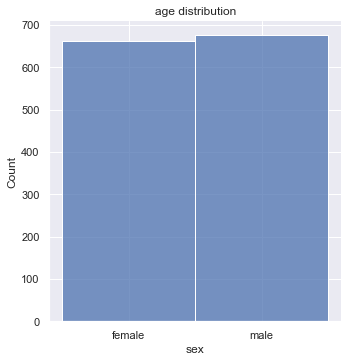

In [26]:
plt.figure(figsize=(10,6))
sns.displot(df['sex'])
plt.title('age distribution')
plt.show()

In [20]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 720x432 with 0 Axes>

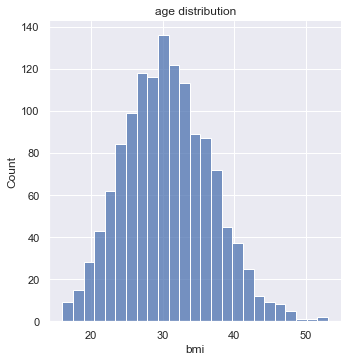

In [27]:
plt.figure(figsize=(10,6))
sns.displot(df['bmi'])
plt.title('age distribution')
plt.show()

C:\Users\91899\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


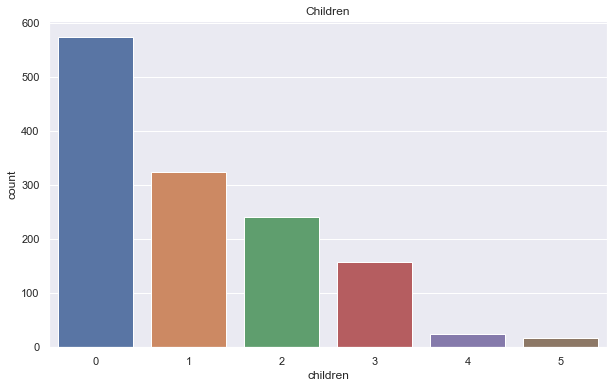

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(df['children'])
plt.title('Children')
plt.show()

In [30]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

C:\Users\91899\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


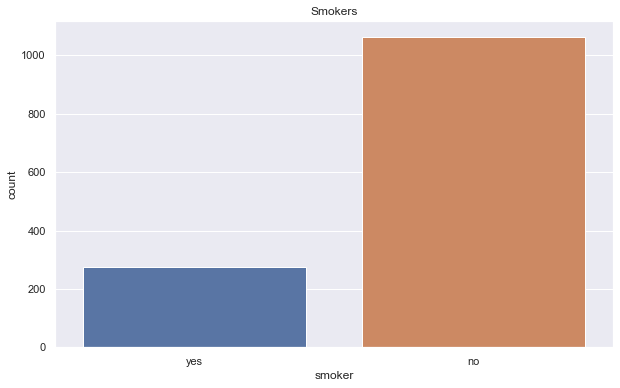

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(df['smoker'])
plt.title('Smokers')
plt.show()

In [32]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\91899\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


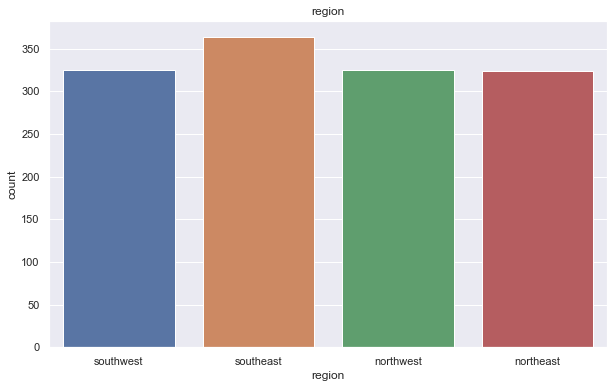

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(df['region'])
plt.title('region')
plt.show()

C:\Users\91899\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


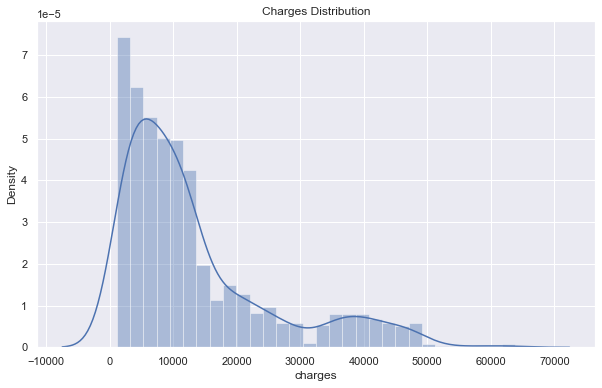

In [36]:
plt.figure(figsize=(10,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

# Data pre-processing

# Encoding labels

In [44]:
df.replace({'sex': {'male': 0, 'female': 1}}, inplace = True)

df.replace({'smoker': {'yes': 0, 'no': 1}}, inplace = True)

df.replace({'region': {'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

# Splitting The Features And Target

In [ ]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [46]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [47]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Splitting the data into Training Data And Test Data

In [48]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [52]:
print(X.shape, X_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model training

# Linear regression

In [53]:
regressor = LinearRegression()

In [54]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [55]:
#Module Evaluation

# prediction on training data

training_data_prediction =regressor.predict(X_train)

In [56]:
# R squared value

r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [58]:
# prediction on test data

test_data_prediction =regressor.predict(x_test)

In [60]:
# R squared value

r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


In [61]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496046


# Saving the training model

In [62]:
import pickle

In [63]:
filename = 'trained_model.sav'

pickle.dump(regressor, open(filename, 'wb'))

# Loading the saved model

In [64]:
loaded_model = pickle.load(open('trained_model.sav', 'rb')) 

In [65]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496046
